<a href="https://colab.research.google.com/github/chevvakavitha/Customer-Segmentation-with-RFM/blob/main/Customer_Segmentation_with_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv',sep='\t')
print('number of rows: ', df.shape[0])
print('number of columns: ', df.shape[1])
df.head()

number of rows:  2240
number of columns:  29


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

rowCount = df.shape[0]
colCount = df.shape[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# get a list of object Dtype columns
obj_list = df.select_dtypes(include=['object']).columns.tolist()

print('Total unique values:')
# get unique values total for each column
for i in obj_list:
    print(i, ":", df[i].nunique())

Total unique values:
Education : 5
Marital_Status : 8
Dt_Customer : 663


In [ ]:
# show the value counts of the categorical columns
print(df['Education'].value_counts())
print()
print(df['Marital_Status'].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.000,5592.160,3246.662,0.000,2828.250,5458.500,8427.750,11191.000
Year_Birth,2240.000,1968.806,11.984,1893.000,1959.000,1970.000,1977.000,1996.000
Income,2216.000,52247.251,25173.077,1730.000,35303.000,51381.500,68522.000,666666.000
Kidhome,2240.000,0.444,0.538,0.000,0.000,0.000,1.000,2.000
Teenhome,2240.000,0.506,0.545,0.000,0.000,0.000,1.000,2.000
Recency,2240.000,49.109,28.962,0.000,24.000,49.000,74.000,99.000
MntWines,2240.000,303.936,336.597,0.000,23.750,173.500,504.250,1493.000
MntFruits,2240.000,26.302,39.773,0.000,1.000,8.000,33.000,199.000
MntMeatProducts,2240.000,166.950,225.715,0.000,16.000,67.000,232.000,1725.000
MntFishProducts,2240.000,37.525,54.629,0.000,3.000,12.000,50.000,259.000


In [ ]:
# Null Values
df_null = pd.DataFrame(df.isnull().sum(), columns=['total_null'])
df_null['null_value_percentage'] = df_null['total_null'] / len(df) * 100

# Filter out columns with no null values
df_null_with_nulls = df_null[df_null['total_null'] > 0]

df_null_with_nulls

,total_null,null_value_percentage
Income,24,1.071


In [ ]:
print("Total number of duplicated rows:")
df.duplicated().sum()

Total number of duplicated rows:


0

In [ ]:
# rename column values
df['Education'].replace(['Basic', '2n Cycle', 'Graduation'], [
                        'no-degree', 'Master', 'Bachelor'], inplace=True)

In [ ]:
# Combine 'kidhome' and 'teenhome' into 'children'

df['Children'] = df['Kidhome'] + df['Teenhome']
df = df.drop(['Kidhome', 'Teenhome'], axis=1)

In [ ]:
# add Fequency and Monetary columns to the dataframe
frequency = ['NumWebPurchases', 'NumCatalogPurchases',
             'NumStorePurchases', 'NumDealsPurchases']
monetary = ['MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df['Frequency'] = df[frequency].sum(axis=1)
df['Frequency'] = df['Frequency'].astype(int)
df['Monetary'] = df[monetary].sum(axis=1)
df['Monetary'] = df['Monetary'].astype(int)

# df = df.drop(frequency, axis=1)
# df = df.drop(monetary, axis=1)

In [ ]:
df_rfm = df[['Recency', 'Frequency', 'Monetary']]
df_rfm.head()

,Recency,Frequency,Monetary
0,58,25,1617
1,38,6,27
2,26,21,776
3,26,8,53
4,94,19,422


In [ ]:
#Clustering
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# min max scaler
from sklearn.preprocessing import MinMaxScaler

# sclae the df_rfm
scaler = MinMaxScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm)
df_rfm_scaled = pd.DataFrame(df_rfm_scaled, columns=df_rfm.columns)


X_train, X_test = train_test_split(df_rfm_scaled, test_size=0.2, random_state=42)

In [ ]:
df_rfm_scaled

,Recency,Frequency,Monetary
0,0.586,0.568,0.640
1,0.384,0.136,0.009
2,0.263,0.477,0.306
3,0.263,0.182,0.019
4,0.949,0.432,0.165
5,0.162,0.500,0.282
6,0.343,0.477,0.232
7,0.323,0.227,0.065
8,0.192,0.136,0.016
9,0.687,0.045,0.017


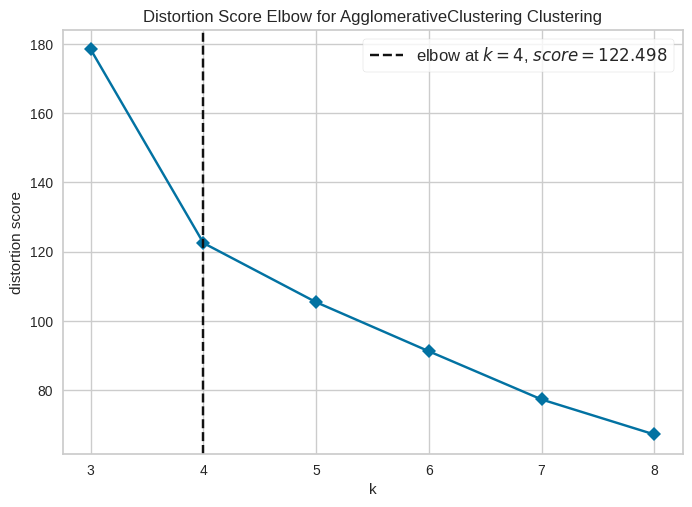

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Create Agglomerative Clustering model
model = AgglomerativeClustering()

# Use the KElbowVisualizer with silhouette score
visualizer = KElbowVisualizer(model, k=(3,9), timings=False)
visualizer.fit(df_rfm_scaled)

# Display the elbow visualization
visualizer.show()

In [ ]:
agloCluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward').fit(df_rfm_scaled)

In [ ]:
# evaluate the model using silhouette_score and distorion score
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print('Silhouette Score: ', silhouette_score(df_rfm_scaled, agloCluster.labels_))
print('Calinski Harabasz Score: ', calinski_harabasz_score(df_rfm_scaled, agloCluster.labels_))

Silhouette Score:  0.3548666811760013
Calinski Harabasz Score:  1613.430662749396


In [ ]:
df_rfm['cluster'] = agloCluster.labels_
df_rfm.head()

,Recency,Frequency,Monetary,cluster
0,58,25,1617,1
1,38,6,27,0
2,26,21,776,2
3,26,8,53,0
4,94,19,422,1


In [ ]:
# create visualization after clustering using sns

# sns.set(style="white", color_codes=True)
# # sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.set(font_scale=1.2)

# create a countplot
print('Cluster Count:')
print(df_rfm['cluster'].value_counts())

Cluster Count:
0    695
1    652
2    544
3    349
Name: cluster, dtype: int64


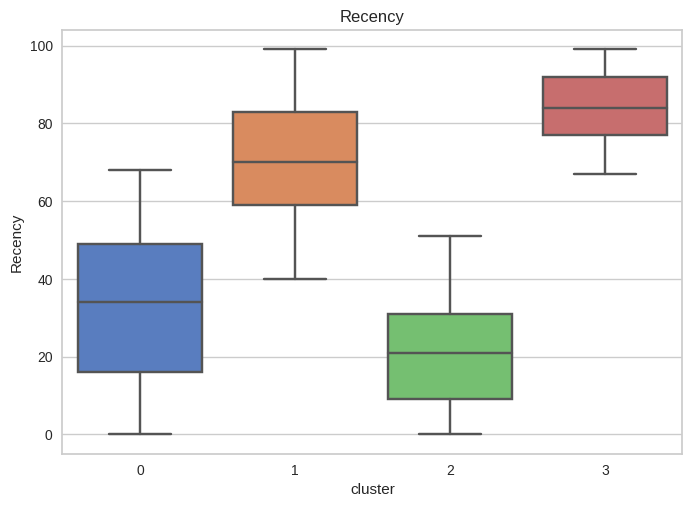

In [ ]:
sns.boxplot(x = df_rfm.cluster, y = df_rfm.Recency, palette='muted')
plt.title('Recency')
plt.show()

In [ ]:
# change the cluster column to descriptive names

df_rfm['cluster'] = df_rfm['cluster'].replace([0, 1, 2, 3], ['Best', 'Intermittent', 'Churned', 'Regular'])

df_rfm.head()

,Recency,Frequency,Monetary,cluster
0,58,25,1617,Intermittent
1,38,6,27,Best
2,26,21,776,Churned
3,26,8,53,Best
4,94,19,422,Intermittent


Cluster Count:
Best            695
Intermittent    652
Churned         544
Regular         349
Name: cluster, dtype: int64


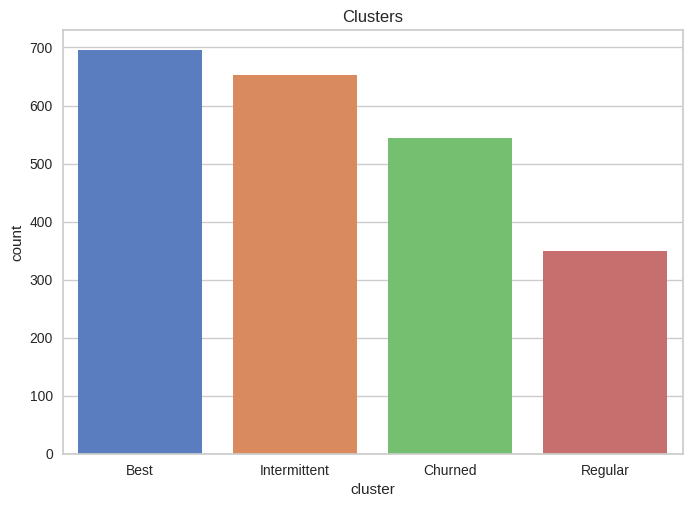

In [ ]:
order = ['Best', 'Intermittent', 'Churned', 'Regular']
# create a countplot
print('Cluster Count:')
print(df_rfm['cluster'].value_counts())

sns.countplot(x='cluster', data=df_rfm, palette='muted', order=order)
plt.title('Clusters')
plt.show()

In [ ]:
df['cluster'] = df_rfm['cluster']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Dt_Customer          2240 non-null   object 
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Frequency,Monetary,cluster
0,5524,1957,Bachelor,Single,58138.000,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,25,1617,Intermittent
1,2174,1954,Bachelor,Single,46344.000,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,6,27,Best
2,4141,1965,Bachelor,Together,71613.000,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,21,776,Churned
3,6182,1984,Bachelor,Together,26646.000,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,8,53,Best
4,5324,1981,PhD,Married,58293.000,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,19,422,Intermittent


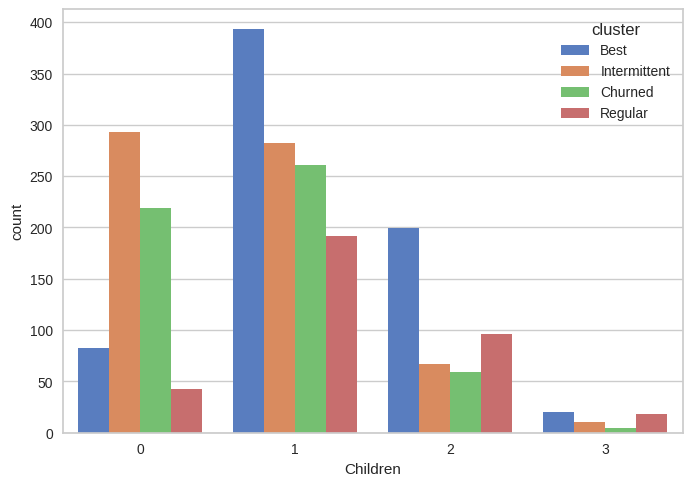

In [ ]:
# Create plot for children vs cluster

sns.countplot(x='Children', hue='cluster', data=df, palette='muted', hue_order=order)
plt.show()

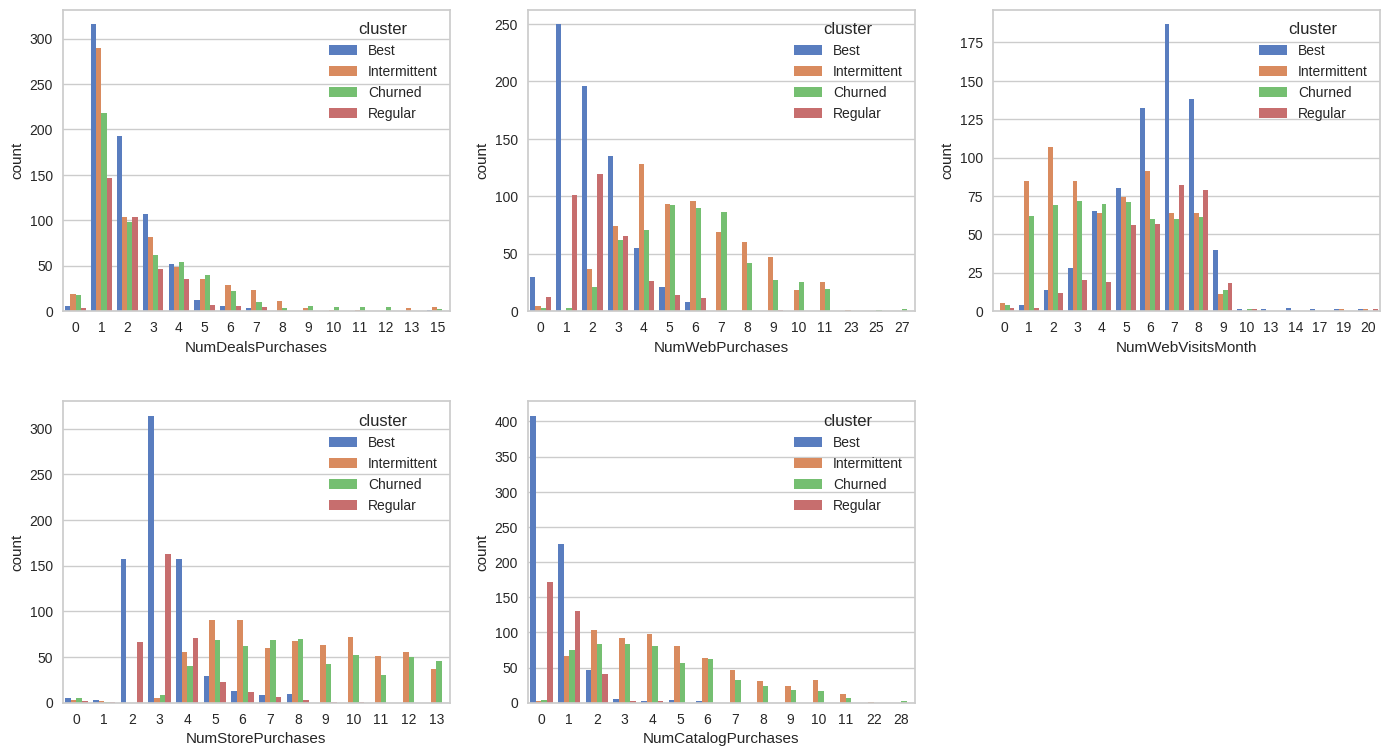

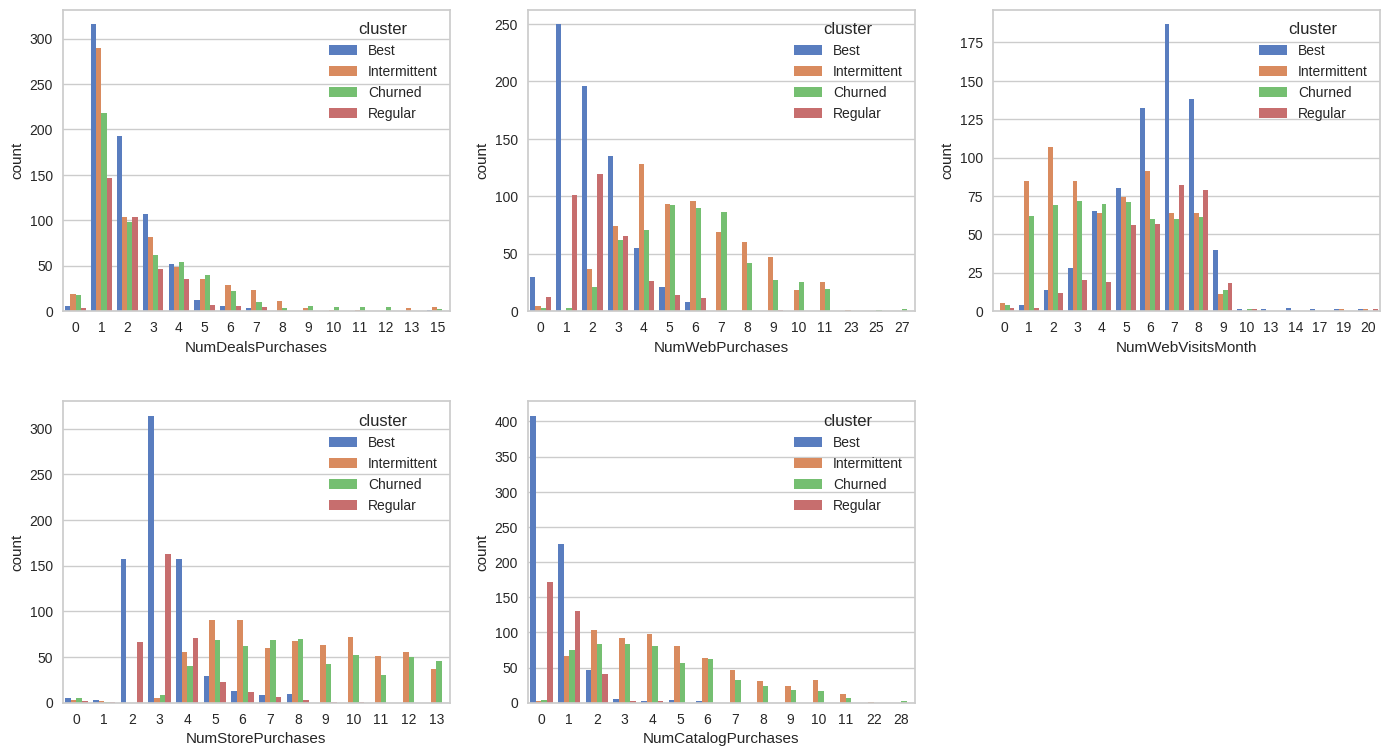

In [ ]:
# Create plot for cluster vs multiple purchases

fig, axes = plt.subplots(2, 3, figsize=(17, 9))
sns.countplot(ax=axes[0, 0], x='NumDealsPurchases', hue='cluster', data=df, palette='muted', hue_order=order)
sns.countplot(ax=axes[0, 1], x='NumWebPurchases', hue='cluster', data=df, palette='muted', hue_order=order)
sns.countplot(ax=axes[0, 2], x='NumWebVisitsMonth', hue='cluster', data=df, palette='muted', hue_order=order)
sns.countplot(ax=axes[1, 0], x='NumStorePurchases', hue='cluster', data=df, palette='muted', hue_order=order)
sns.countplot(ax=axes[1, 1], x='NumCatalogPurchases', hue='cluster', data=df, palette='muted', hue_order=order)
axes[1, 2].axis('off')
plt.subplots_adjust(hspace=0.3)
plt.show()